## Volatility Estimators

Volatility estimation is of central importance to risk management, pricing and portfolio construction and a number of attempts have been made in the last 25 years to improve upon the classical standard deviation of daily returns as an estimator of asset volatility. Many of these estimators, such as those developed
by Parkinson [1980], Garman and Klass [1980], Rogers and Satchell [1991] and Yang and Zhang [2002] use information on daily trading ranges – the intraday high and low prices in the asset, while others - Cho Frees [1986] and the first exit times [2008], consider how quickly the price changes rather than how much the price changes. Compared to the classical close to close estimator, these estimators have a theoretical efficiency that is 5 times greater in the case of the Parkinson estimator,
while in the case of the Garman and Klass and Yang and Zang estimators the efficiency is typically as much as 7 or 8 times, depending on the estimation period and the assumed characteristics of the underlying asset process.

The following implementations and descriptions closely follow the revisions on volaility trading by Euan Sinclair (https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781118662724.fmatter) and Marcos Lopez De Prado (https://www.wiley.com/en-us/Advances+in+Financial+Machine+Learning-p-9781119482086). 

This module gives the ability to calculate the different estimators according to their original formulas.

Note: Please use data sets with columns: "open", "high", "low" and "close" in that order for each of the volatility estimators.

## Classical estimation of volatility

A geometric Brownian motion process for an asset with price S
 evolves as follows:

 $$ d S_{t}=\mu S_{t} d t+\sigma S_{t} d Z_{t} $$

where µ is the asset drift, σ is the volatility (assumed constant) and Z is a Weiner
process. From Ito’s lemma the log of the asset price is given by:

$$ d \ln S_{t}=\left(\mu-\frac{1}{2} \sigma^{2}\right) d t+\sigma d Z_{t} $$ 

From here, we can derive the classical variance estimator $\sigma^{2}$ which is given by:

$$ \hat{\sigma}_{c}^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left[\left(o_{i}+c_{i}\right)-\frac{1}{n} \sum_{i=1}^{n}\left(o_{i}+c_{i}\right)\right]^{2}$$



## Parkinson Estimator of Volatility 

Different alternative volatility estimators have been developed along the years to improve the efficiency of the classical one. 

The first of them was developed by Parkinson in 1980. Parkinson estimator makes use of high and low prices and is up to 5 times more efficient than the classical estimator. Two slighly different formula of the estimator are provided in Sinclair's and De Prado's book. According to Sinclair, Parkinson estimator is computed as follow: 

$$\sigma=\sqrt{\frac{1}{4 N \ln 2} \sum_{i=1}^{N}\left(\ln \frac{h_{i}}{1_{i}}\right)^{2}} $$

where $h_{\mathrm{i}}$ is the high price in the trading period and $l_{\mathrm{i}}$ is the low price. In De Prado's book instead the estimator is calculated as follow:

$$\mathrm{E}\left[\frac{1}{T} \sum_{t=1}^{T}\left(\log \left[\frac{H_{t}}{L_{t}}\right]\right)^{2}\right]=k_{1} \sigma_{H L}^{2}$$

where $k_{1}=4 \log [2]$, $H_{\mathrm{t}}$ is the high price for bar t, and $L_{\mathrm{t}}$ is the low price for bar t. 

Parkinson estimator makes use of daily range which seems sensible and provides completely separate information to using time-based samplings such as closing prices. However, it is only appropriate for measuring volatility on the assumption that the asset process is continuous and follows a geometric Brownian motion, that volatility is constant, and that the drift in the underlying
process is zero. In the overall, this estimator performs badly in the case the abovementioned assumptions are not met and tends to understimate volatility.

In steps that follow, we are going to calculate volatility with Parkinson estimator as defined by the two different formulas discussed.


In [1]:
# Import packages
import yfinance as yf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as pp

# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import parkinson

To showcase the module functionality we will use SPY data from Yahoo Finance:

In [2]:
# Import data from Yahoo finance
o_h_l_c =  yf.download("SPY", start="2012-03-25", end="2013-12-09")

[*********************100%***********************]  1 of 1 completed


In [3]:
# View the data 
o_h_l_c.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-26,140.649994,141.610001,140.600006,141.610001,114.699654,120164000
2012-03-27,141.740005,141.830002,141.080002,141.169998,114.343285,119868500
2012-03-28,141.100006,141.320007,139.639999,140.470001,113.776283,148562100
2012-03-29,139.639999,140.490005,139.089996,140.229996,113.581894,164963700
2012-03-30,140.919998,141.050003,140.050003,140.809998,114.051689,135486800


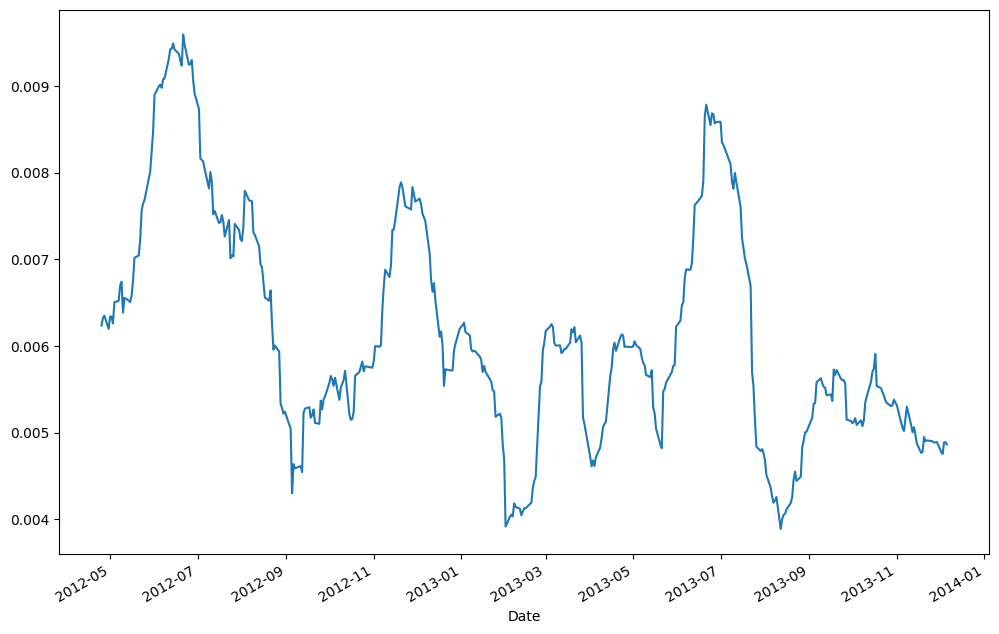

In [4]:
# Calculate volatility with Parkinson estimator using Sinclair's formula and plot volatility
parkinson(o_h_l_c , 22, False).plot(figsize=(12,8));

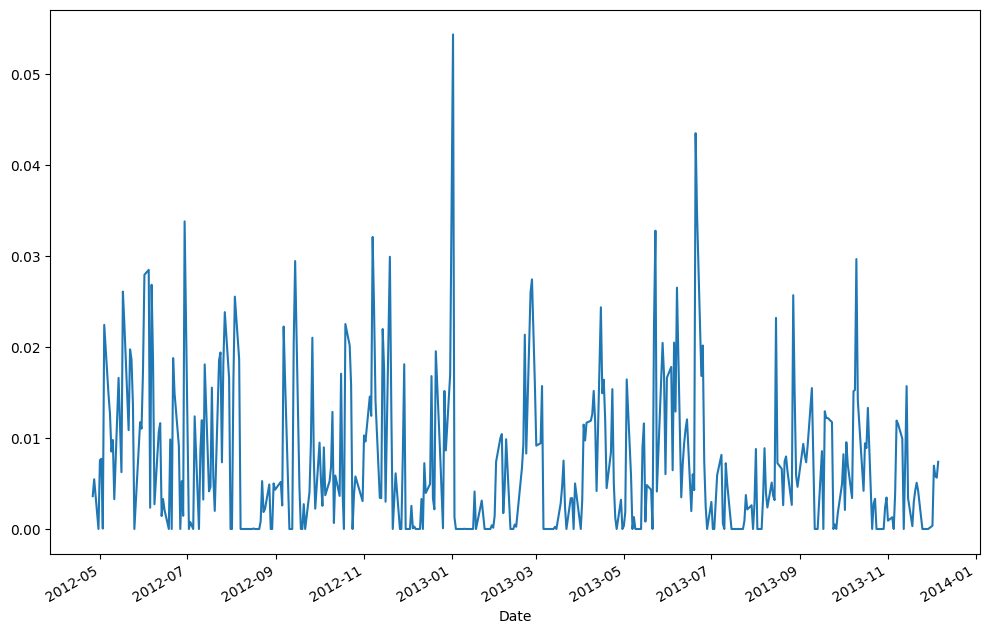

In [5]:
# Calculate volatility with Parkinson estimator using De Prado's formula and plot volatility
parkinson(o_h_l_c , 22, True).plot(figsize=(12,8));

## Garman Klass Estimator of Volatility 

Garman-Klass volatility estimator was proposed in 1980 as an extension of Parkinson' estimator. In fact, Garman-Klass includes closing prices to overcome the limitation of discrete sampling and the fact that markets are usually more active during the opening and closing hours. The estimator is defined as: 

$$\sigma=\sqrt{\frac{1}{N} \sum_{i=1}^{N} \frac{1}{2}\left(\ln \frac{h_{i}}{l_{i}}\right)^{2}-\frac{1}{N} \sum_{i=1}^{N}(2 \ln 2-1)\left(\ln \frac{c_{i}}{c_{i-1}}\right)^{2}}$$

where $h_{\mathrm{i}}$ is the high price, $l_{\mathrm{i}}$ is the low price and $c_{\mathrm{i}}$ is the closing price in the trading period.

The Garman-Klass volatility estimator is up to eight times more efficient than close-to-close estimator and it makes the best use of the commonly available price information, however it is more biased than the Parkinson estimator.

In steps that follow, we are going to calculate volatility with Garman Klass estimator.

In [6]:
# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import garman_klass

To showcase the module functionality we will use SPY data from Yahoo Finance, and select high, low and close daily prices:

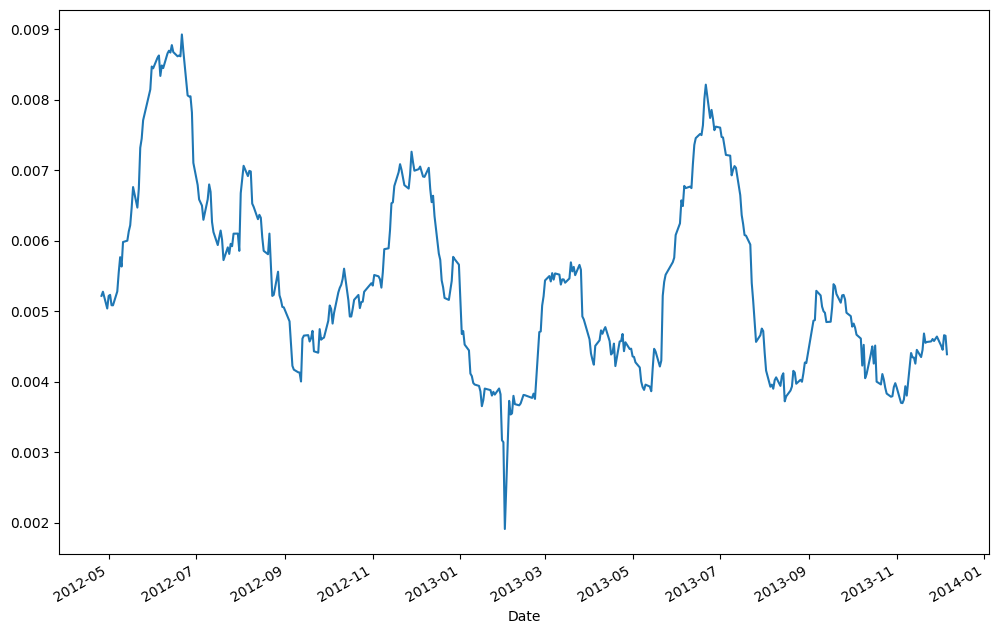

In [7]:
# Calculate volatility with Garman Klass estimator
garman_klass(o_h_l_c , 22).plot(figsize=(12,8));

## Rogers Satchell Estimator of Volatility 

Rogers-Satchell is a volatility estimator that makes use of daily high/low prices as well as open/close prices in order to provides better volatility estimates during periods in which the asset trends strongly. The estimator is defined as:

$$\sigma=\sqrt{\frac{1}{N} \sum_{i=1}^{N}\left(\ln \frac{h_{i}}{c_{i}}\right)\left(\ln \frac{h_{i}}{o_{i}}\right)+\left(\ln \frac{1_{i}}{c_{i}}\right)\left(\ln \frac{1_{i}}{o_{i}}\right)}$$

where $h_{\mathrm{i}}$ is the high price, $l_{\mathrm{i}}$ is the low price, $o_{\mathrm{i}}$ is the opening price and $c_{\mathrm{i}}$ is the closing price in the trading period.

The main advantage of the Rogers-Satchell is that it allows for the presence of trends, however the estimator still suffers from biased estimates as it still cannot deal with jumps.

In steps that follow, we are going to calculate volatility with Rogers Satchell estimator.

In [8]:
# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import rogers_satchell

To showcase the module functionality we will use SPY data from Yahoo Finance, and select high and low, open and close daily prices:

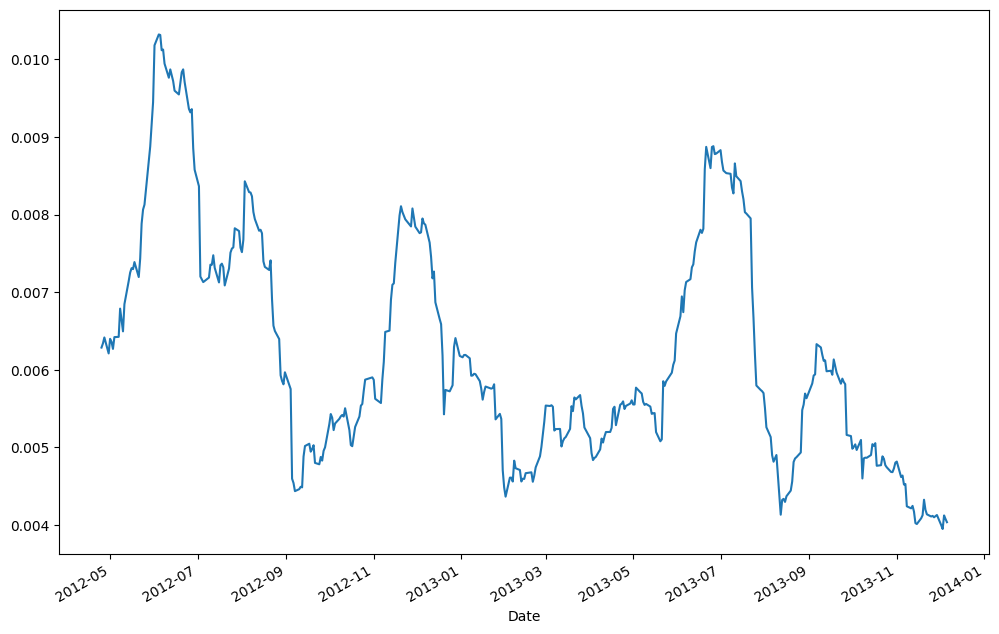

In [9]:
# Calculate volatility with Rogers Satchell estimator
rogers_satchell(o_h_l_c, 22).plot(figsize=(12,8));

## Yang Zhang Estimator of Volatility 

Yang Zhang estimator is a volatility estimator specifically designes to have minimum estimation error and to handle both drift and jumps in price. In order to achieve this, the estimator make use of all available data (close and open prices, low and high prices), as follow:

$$\sigma=\sqrt{\frac{1}{N} \sum_{i=1}^{N}\left(\ln \frac{h_{i}}{c_{i}}\right)\left(\ln \frac{h_{i}}{o_{i}}\right)+\left(\ln \frac{l_{i}}{c_{i}}\right)\left(\ln \frac{l_{i}}{o_{i}}\right)}$$

where $h_{\mathrm{i}}$ is the high price, $l_{\mathrm{i}}$ is the low price, $o_{\mathrm{i}}$ is the opening price and $c_{\mathrm{i}}$ is the closing price in the trading period.

In simulation studies it has been shown that the estimator is among the most efficient ones but still suffers when the process is dominated by jumps.

In steps that follow, we are going to calculate volatility with Yang Zhang estimator.

In [10]:
# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import yang_zhang

To showcase the module functionality we will use SPY data from Yahoo Finance, and select open and close as well as high and low daily prices:

In [11]:
# Renaming the columns so it stays consistent with the functions inputs
o_h_l_c = o_h_l_c.iloc[:, 0:-1]
rename_columns = {"Open": "open", "High": "high", "Low": "low", "Close": "close"}
o_h_l_c = o_h_l_c.rename(columns=rename_columns)

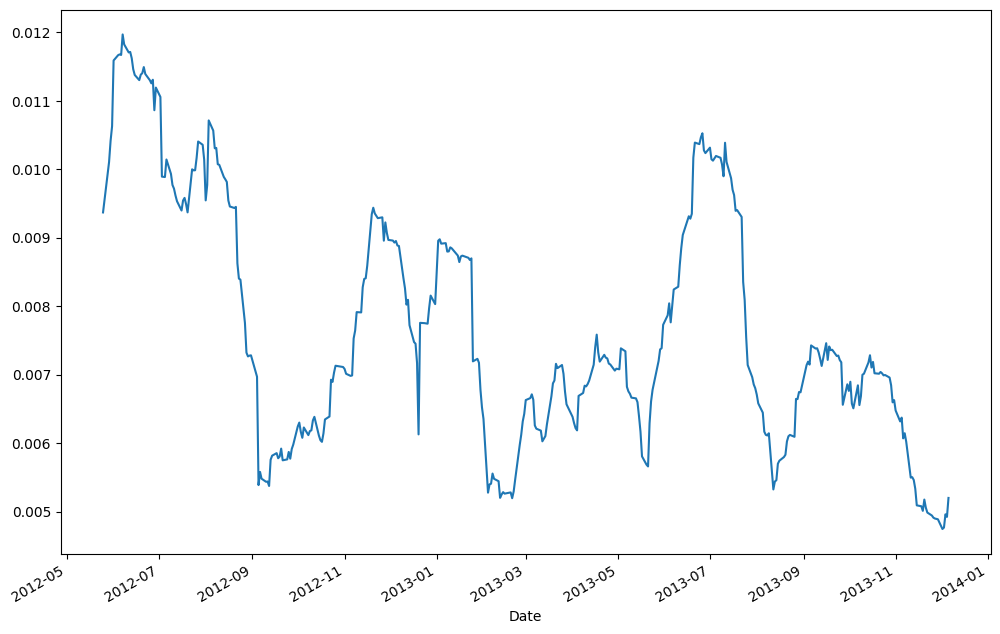

In [12]:
# Calculate volatility with Yang Zhang estimator
yang_zhang(o_h_l_c, 22).plot(figsize=(12,8));

## Corwin Shultz Estimator of Volatility 

Corwin-Schultz estimator measures the bid-ask spread from daily high and low prices, as it assumes that the ratio of high-to-low prices for a day reflects both the fundamental volatility of stock and its bid-ask spread. Another assumption of the Corwin-Shultz estimator is that the volatility component of the high-to-low price ratio increases proportionately with the length of trading interval whereas the component due to bid-ask spreads does not. The formula to calculate the bid-ask spread with Corwin-Shultz estimator is:

$$S_{t}=\frac{2\left(e^{\alpha_{t}}-1\right)}{1+e^{\alpha_{t}}}$$

where

$$\alpha_{t}=\frac{\sqrt{2 \beta_{t}}-\sqrt{\beta_{t}}}{3-2 \sqrt{2}}-\sqrt{\frac{\gamma_{t}}{3-2 \sqrt{2}}}$$

$$    \beta_{t}=\mathrm{E}\left[\sum_{j=0}^{1}\left[\log \left(\frac{H_{t-j}}{L_{t-j}}\right)\right]^{2}\right]$$

$$\gamma_{t}=\left[\log \left(\frac{H_{t-1, t}}{L_{t-1, t}}\right)\right]^{2}$$

It is worth highlighting that Corwin-Schultz estimation bias and the frequency of negative estimates increase in liquid assets or when price volatility is high.

In steps that follow, we are going to calculate volatility with Corwin-Schultz estimator.

In [13]:
# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import CorwinShultzVolatility

To showcase the module functionality we will use SPY data from Yahoo Finance, and select high and low daily prices:

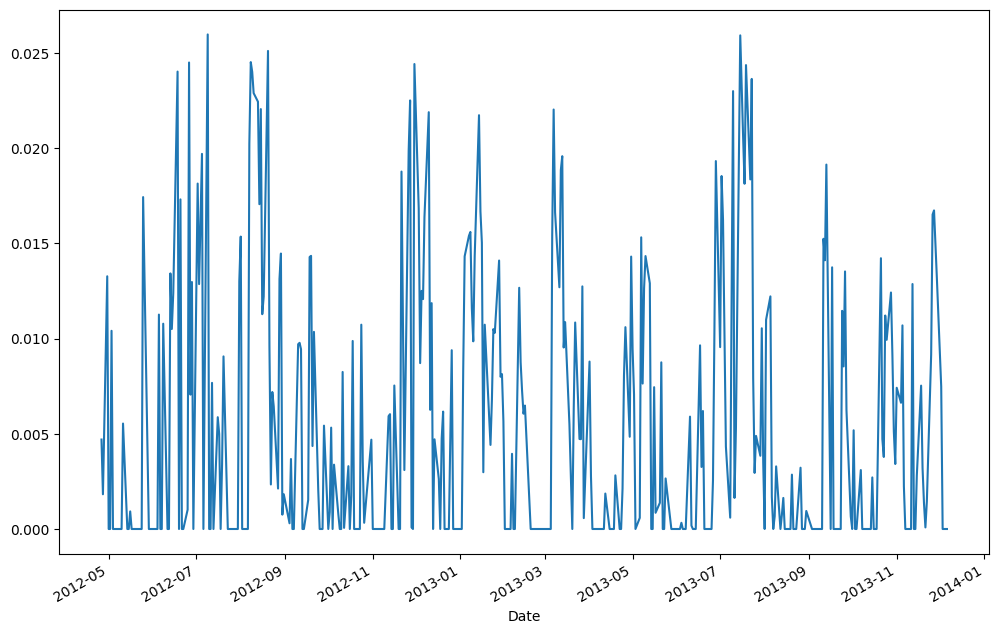

In [14]:
temp_corwin_shultz = CorwinShultzVolatility(o_h_l_c ,22)
temp_corwin_shultz.calculate_volatility().plot(figsize=(12,8));

## Cho Frees Estimator of Volatility 

Cho Frees estimator is a volatility estimator which aims to measure how quickly the price changes rather than how much the price changes an estimator is constructed. In order to do so, the estimator involves the use of different information with respect to traditional time-series. The estimator in fact is constructed by considering a price corridor, ∆ up and ∆ down from the initial spot price. Each time the upper or lower barrier of the corridor is
touched, the barrier is reset around the current price, and the times to reach the barrier noted form a sequence of exit
times from which the volatility is estimated according to the formula:

$$\hat{\sigma}^{2}=2 \hat{\mu} \delta /\left(\log \left(\delta+\hat{\mu} \bar{\tau}_{n}\right)-\log \left(\delta-\hat{\mu} \bar{\tau}_{n}\right)\right)$$

where $\delta=\log (1+d)$ being d a known constant (1/8 for the New York Stock Exchange for example),
$\hat{\mu}=\bar{\tau}_{n}^{-1} \log \left(P\left(\tau_{n}\right)\right)$ and
$\bar{\tau}_{n}=\tau_{n} / n$.

It is shown that this estimator has desirable asymptotic properties, including consistency and normality.
Also, it outperforms natural estimators for low and middle priced stocks. Further, simulation studies demonstrates
that the proposed estimator is robust to certain misspecifications in measuring the time between price changes. The only negative aspect of this estimator is that it requires the use of high-frequency data.

In steps that follow, we are going to calculate volatility with Cho Frees estimator.

In [15]:
# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import cho_frees

To showcase the module functionality we will use SPY data from Yahoo Finance, and select close daily prices:

In [16]:
# Test dataset consisting of Close data
# Specify Close data within o_h_l_c
d_c = o_h_l_c.iloc[:, 3:4]
d_c.head()

,close
Date,
2012-03-26,141.610001
2012-03-27,141.169998
2012-03-28,140.470001
2012-03-29,140.229996
2012-03-30,140.809998


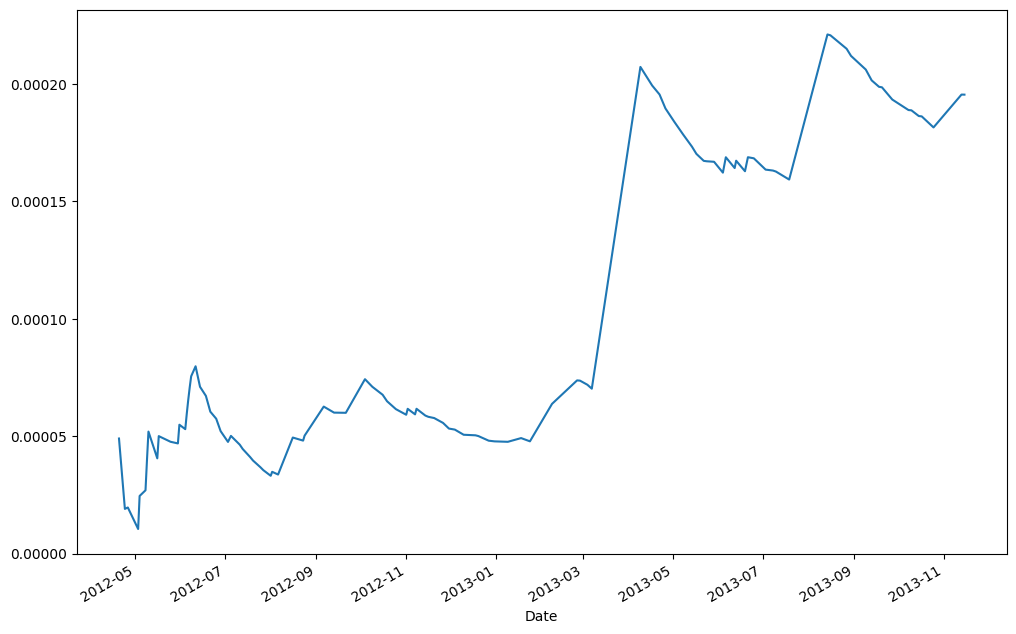

In [17]:
cho_frees(o_h_l_c, 0.01).plot(figsize=(12,8));

## First Exit Times Estimator of Volatility

First exit times estimator is a variant of Cho Frees' s volatility estimator presented in Sinclair's book. As Cho Frees estimator, the estimator is constructed by forming a double barrier corridor around an initial price, and each time the price touches one of the barrier the reference price is reset and gives rise to a new price corridor. From the consecutive exit times volatility is derived through the formula: 

$$
    \sigma=\frac{\Delta}{\sqrt{E[\tau]}}$$

where $E[\tau]$ is the sample mean of the hitting times after n observations.
The sample volatility derived with this formula is biased unless n is large, therefore we can derive the unbiased
volatility by considering this relationship between the two:

$$ E[f(\bar{\tau})]=\sigma\left(1+\frac{1}{4 n}\right)$$

where $E[f(\bar{\tau})]$is the sample biased volatility, and $sigma$ is the unbiased volatility.

This estimator assumes Brownian motion for the log-price process and a negligible drift in prices, hence its
estimates may be biased in periods of time during which prices trends significantly.

In steps that follow, we are going to calculate volatility with first exit times estimator.

In [18]:
# Import MlFinLab tools
from mlfinlab.features.volatility_estimators import first_exit_times

To showcase the module functionality we will use SPY data from Yahoo Finance, and select close daily prices:

In [19]:
# Test dataset consisting of Close data
# Specify Close data within o_h_l_c
d_c = o_h_l_c.iloc[:, 3:4]
d_c.head()

,close
Date,
2012-03-26,141.610001
2012-03-27,141.169998
2012-03-28,140.470001
2012-03-29,140.229996
2012-03-30,140.809998


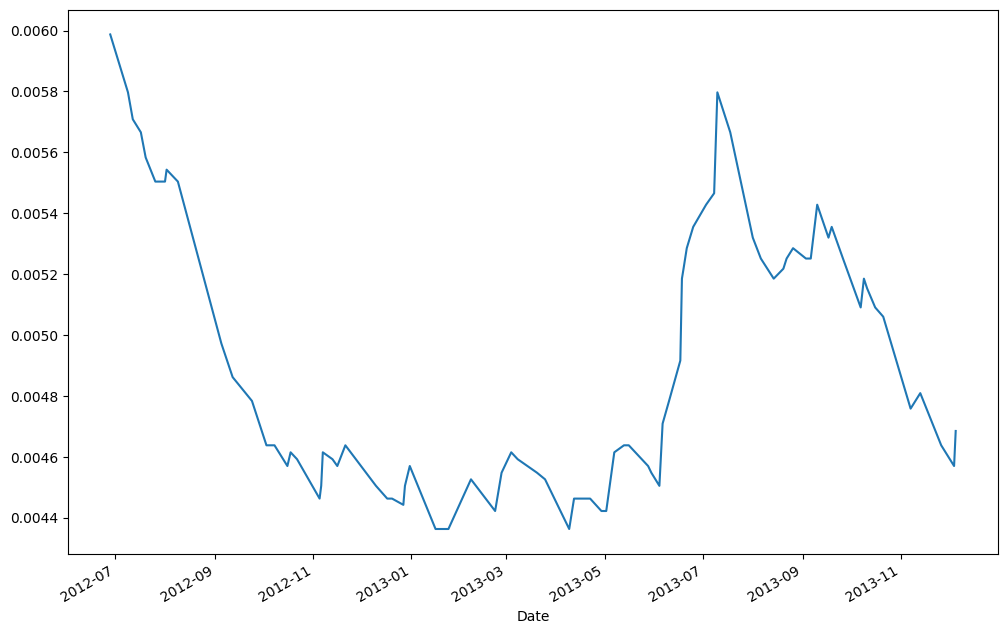

In [20]:
first_exit_times(d_c, 0.01, 22).plot(figsize=(12,8));

## Conclusion

This notebook describes the different estimators for calculating historical volatility.

These estimators have been extensively reviewed in the books on volatility trading by Euan Sinclair (https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781118662724.fmatter) and Marcos Lopez De Prado (https://www.wiley.com/en-us/Advances+in+Financial+Machine+Learning-p-9781119482086).

Key takeaways from the notebook:

* Volatility (usually denoted by σ) is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.

* Volatility estimates can provide a profit opportunity by identifying swings and helping with bet and portfolio sizing estimates can provide a profit opportunity by identifying swings and helping with bet and portfolio sizing.

* Historic volatility measures a time series of past market prices, and different estimators have been developed in order to measure it.

* The different volatility estimators may behave differently according to the market conditions, and it is appropriate to identify the most proper to use to avoid biased estimates.



## Reference

1. Sinclair, E. (2008) Volatility Trading. John Wiley & Sons, Hoboken, NJ.
2. Lopez de Prado, M. (2018) Advances in Financial Machine Learning. New York, NY: John Wiley & Sons.
3. Parkinson, Michael H.. “The Extreme Value Method for Estimating the Variance of the Rate of Return.” The Journal of Business 53 (1980): 61-65.
4. Garman, M. B., and M. J. Klass. 1980. ‘‘On the Estimation of Security Price Volatilities from Historical Data.’’ Journal of Business 53:67–78.
5. Rogers, L., S. Satchell, and Y. Yoon. 1994. ‘‘Estimating the Volatility of Stock Prices: A Comparison of Methods that Use High and Low Prices.’’ Applied Financial Economics 4:241–247.
6. Yang, D., and Q. Zhang. 2000. ‘‘Drift-Independent Volatility Estimation Based on High, Low, Open, and Close Prices.’’ Journal of Business 73:477–491.
7. Corwin S.A. and Schultz P. (2012), A Simple Way to Estimate Bid-Ask Spreads from Daily High and Low Prices. The Journal of Finance, 67: 719-760
8. Cho D, Frees E. "Estimating  the  Volatility  of Discrete  Stock  Prices."  Working  paper, University of  Wisconsin-Madison, 1986.
